# Neural networks Assignment 3
## Exercise 1a: Fashion MNIST
Image classification is a classical task in machine learning. MNIST serves as a good starting point for testing out algorithms and learning. Some criticism that has been pointed out is that it is fairly easy to get good (well above 95%) accuracy. In this exercise you will perform image classification on a similar dataset known as Fashion MNIST. The dataset consists of 10 categories of different clothing, and the overall objective is to find a feed-forward neural network which can distinguish images on the different sets of clothes. The dataset contains 60,000 images for training and 10,000 for testing just as the ordinary MNIST. The images are 28x28 pixels.
The following elements should be included and printed/plotted in your code.

1. Plot 16 random samples from the training set with the corresponding labels.

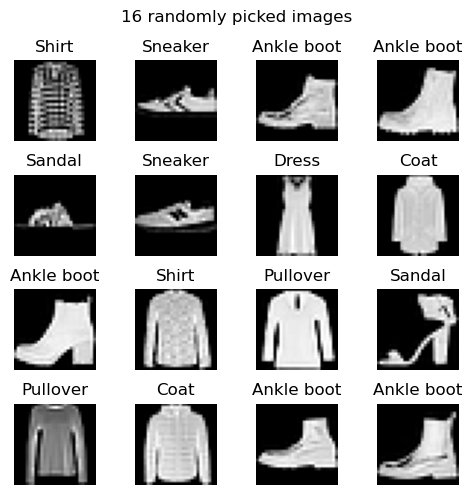

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mnist_reader import load_mnist

# Save labels as strings for presentation
label_description = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Load data with pre-made method found:
# https://github.com/zalandoresearch/fashion-mnist
training_data, training_labels = load_mnist('MNIST_fashion', 'train')
test_data, test_labels = load_mnist('MNIST_fashion', 't10k')

# Create plots
num_images = 16
fig, axes = plt.subplots(4, 4, figsize=(5,5))

# Iterate and choose a random sample too display
for i in range(num_images):

  n = np.random.randint(0, training_data.shape[0])
  image_pixels = training_data[n].reshape(28, 28)
  label = label_description[training_labels[n]]

  # Fetch the correct image in the 4x4 grid.
  ax = axes[i // 4, i % 4]
  ax.imshow(image_pixels, cmap='gray')
  ax.set_title(label)
  ax.axis('off')

plt.tight_layout()
fig.suptitle(f'{num_images} randomly picked images')
fig.subplots_adjust(top=0.88)
plt.show()



2. Train a multilayer perceptron to achieve as good accuracy as you can. There are numerous hyperparameters that we discussed in class which you can tweak, for instance: learning rate, number of and size of hidden layers, activation function and regularization (e.g. Ridge (known here as L2), and early stopping). You should make a structured search for the best hyperparameters that you can find.

### Answer

By using scikit-learns GridSearch algorithm I have tried different parameters. Notable tests that provided some kind of insight in the tuning process have been documented in the _test section_ found below my code.

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create scaler object
scaler = StandardScaler()
scaler.fit(training_data)

# Normalize data
training_data_scaled = scaler.transform(training_data)
test_data_scaled = scaler.transform(test_data)

# Parameters for grid search
param_grid = {
    'hidden_layer_sizes': [(100)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam'],
    'alpha': [0.1],
    'learning_rate_init': [0.001, 0.1, 0.0001],
    'max_iter': [150],
    'early_stopping': [True]
}

# Create MLP object
mlp_classifier = MLPClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(training_data_scaled, training_labels)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Grid Search finished.")
print(f"Best Parameters Found: \n{best_params}")
print(f"\nUsing optimal hyperparameters to create best model...")

# Train MLP
best_model.fit(training_data_scaled, training_labels)

# Predict
y_pred = best_model.predict(test_data_scaled)

# Test accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("----Result with best model----")
print(f"Accuracy Score: {accuracy}")

Iteration 1, loss = 0.80914211
Validation score: 0.819917
Iteration 2, loss = 0.46468525
Validation score: 0.844833
Iteration 3, loss = 0.40504793
Validation score: 0.858583
Iteration 4, loss = 0.37307750
Validation score: 0.862583
Iteration 5, loss = 0.34938433
Validation score: 0.867500
Iteration 6, loss = 0.33232815
Validation score: 0.873333
Iteration 7, loss = 0.31734981
Validation score: 0.875250
Iteration 8, loss = 0.30568551
Validation score: 0.875667
Iteration 9, loss = 0.29481084
Validation score: 0.879583
Iteration 10, loss = 0.28398740
Validation score: 0.877000
Iteration 11, loss = 0.27484792
Validation score: 0.881000
Iteration 12, loss = 0.26634896
Validation score: 0.881833
Iteration 13, loss = 0.25812076
Validation score: 0.883167
Iteration 14, loss = 0.25122461
Validation score: 0.886083
Iteration 15, loss = 0.24490606
Validation score: 0.883250
Iteration 16, loss = 0.23763951
Validation score: 0.887000
Iteration 17, loss = 0.23171712
Validation score: 0.886167
Iterat

## Tests

### Model test
|#|Accuracy|Parameter|Comment|
|-|-------|----------|-----------|
|1|0.8689|hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000|First try without any preprocessing or normalization|
|2|0.8814|hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, early_stopping=True|Data normalized with standardScaler|
|3|0.8818|'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 100), 'max_iter': 2000, 'solver': 'adam'|Parameters found using GridSearch #1|
|4|0.8787|'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 75, 'max_iter': 2000, 'solver': 'adam'|Parameters found using GridSearch #2|
|5|0.8903|'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (200, 100), 'max_iter': 1000, 'solver': 'adam'|Parameters found using GridSearch #3|
|6|0.8824|hidden_layer_sizes=(100), activation='relu', alpha=0.1, solver='adam', max_iter=1000, validation_fraction=0.2|Back to manual input of parameters, computing time can be lowered considerably by making a more simple model with fewer layers without sacrificing accuracy|
|7|0.8852|'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': 100, 'max_iter': 150, 'solver': 'adam'|Parameters found using GridSearch #4|
|8|0.8867|hidden_layer_sizes=(100, 10), activation='relu', alpha=0.1, solver='adam', max_iter=100, validation_fraction=0.2|Manual test, I believe the most important hyperparameters as observed so far is the layer size, I should do another Grid Search with this in mind|
|9|0.8827|'activation': 'relu', 'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': 100, 'max_iter': 150, 'solver': 'adam'|Parameters found using GridSearch #5, No point in creating more complex layers models, stick with single 100 layer|
|10|0.8882|'activation': 'relu', 'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.0001, 'max_iter': 150, 'solver': 'adam'|Parameters found using GridSearch #6|


### Grid Search with 5 fold cross-validation setting enabled
|#|Time to compute|GridSearch Parameters|Conclusion best parameters|
|-|---------|---------------------|--------------------------|
|1|24m 26.8s|'hidden_layer_sizes': [(50, 100)], 'activation': ['relu'], 'solver': ['adam'], 'alpha': [0.1, 0.001],'max_iter': [1000, 2000]|'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 100), 'max_iter': 2000, 'solver': 'adam'|
|2|16m 59.8s|'hidden_layer_sizes': [(50), (75), (100)], 'activation': ['relu'], 'solver': ['adam'], 'alpha': [0.1], 'max_iter': [2000]|'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 75, 'max_iter': 2000, 'solver': 'adam'|
|3|19m 14.6s|'hidden_layer_sizes': [(50, 100), (75, 100), (200, 100)],'activation': ['relu'],'solver': ['adam'],'alpha': [0.1],'max_iter': [1000]|'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (200, 100), 'max_iter': 1000, 'solver': 'adam'|
|4|24m 31.1s|'hidden_layer_sizes': [(100)],'activation': ['relu', 'tanh', 'logistic'],'solver': ['adam'],'alpha': [0.1],'max_iter': [150]|'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': 100, 'max_iter': 150, 'solver': 'adam'|
|5|7m 11.3s (EARLY STOPPING ENABLED)|'hidden_layer_sizes': [(100), (100, 10), (120, 60, 30)],'activation': ['relu',],'solver': ['adam'],'alpha': [0.1],'max_iter': [150],'early_stopping': [True]|'activation': 'relu', 'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': 100, 'max_iter': 150, 'solver': 'adam'|
|6|19m 7.4s|'hidden_layer_sizes': [(100)],'activation': ['relu', 'logistic'],'solver': ['adam'],'alpha': [0.1],'learning_rate_init': [0.001, 0.1, 0.0001],'max_iter': [150],'early_stopping': [True]|'activation': 'relu', 'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.0001, 'max_iter': 150, 'solver': 'adam'|

### Choice of solver
While testing single models with both the regular 'sgd' and the 'adam' setting no major improvements have been detected. The 'adam' setting is the more optimized version of the Stochastic gradient descent algorithm and is therefore chosen as main method.

## Exercise 1b: Fashion MNIST analysis and further extension (VG-exercise)

We will continue to work on the Fashion MNIST data (and our model) from Exercise 2a. Using the final model found in 2a you should go in and investigate the results, and carry the analysis further.

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create scaler object
scaler = StandardScaler()
scaler.fit(training_data)

# Normalize data
training_data_scaled = scaler.transform(training_data)
test_data_scaled = scaler.transform(test_data)

# Train model with optimized parameters and predict labels
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100), activation='relu', alpha=0.01, solver='adam', max_iter=100, learning_rate_init=0.0001, validation_fraction=0.2, early_stopping=True)
mlp_classifier.fit(training_data_scaled, training_labels)
y_pred = mlp_classifier.predict(test_data_scaled)
accuracy = accuracy_score(test_labels, y_pred)
print(f"Model trained with accuracy: {round((accuracy * 100), 2)}%")

Model trained with accuracy: 87.9


- Plot the confusion matrix. Which are the easy/hard categories to classify? Are there any particular classes that often gets mixed together?

**Answer**:
As seen in the confusion matrix there are a couple of notable entries. The percentage shown in the confusion matrix is the percentage of guesses for that particular label.

Easiest to predict:
- Trousers 96.5%
- Sneaker 96.2%
- Bag 96.0%

Hardest to predict:
- Shirt 69.6%
- Pullover 81.3%
- Coat 82.2%

Most common misclassifications:
- T-shirt/Top as Shirt 11.1%
- Shirt as T-shirt/Top 11.0%
- Shirt as Pullover 9.3%
- Pullover as Coat 8.4%


![Confusion_Matrix](img/confusion_matrix_1b.png)

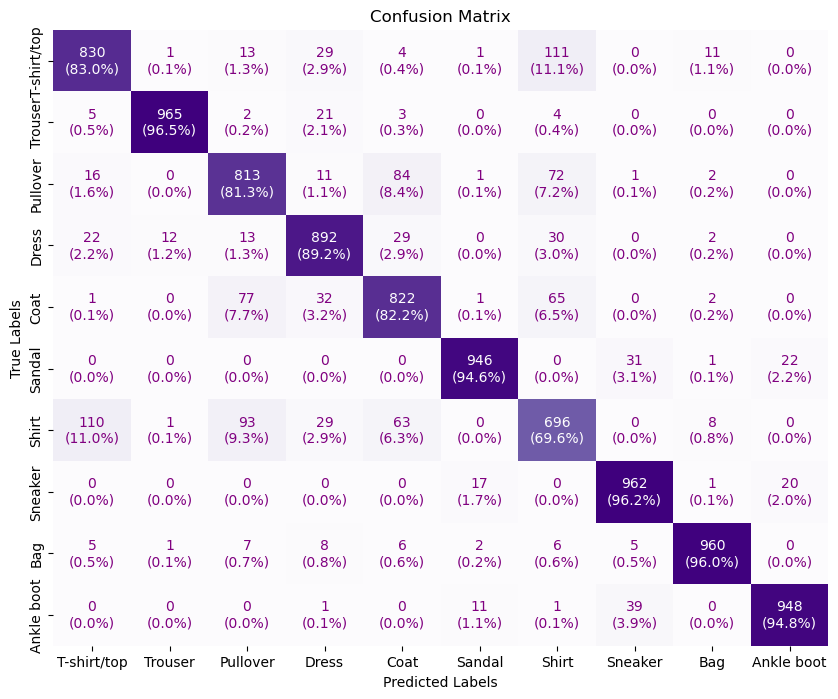

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot the confusion matrix, visualized with seaborn
# Code inspired by: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# and revisited for corrections and improvements with knowledge from 
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)

# Write out labels so we know what index = clothing article
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Calculate percentage
def calculate_conf_matrix_percentage(confusion_matrix):
   return confusion_matrix/np.sum(confusion_matrix, axis=1, keepdims=True)

percentage_conf_matrix = calculate_conf_matrix_percentage(conf_matrix)


# Plot confusion matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(percentage_conf_matrix, annot=False, fmt='.2%', cmap='Purples', xticklabels=labels, yticklabels=labels, cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        count = conf_matrix[i, j]
        percentage = percentage_conf_matrix[i, j]
        text_color = 'white' if percentage_conf_matrix[i, j] > 0.65 else 'purple'
        heatmap.text(j + 0.5, i + 0.5, f"{count}\n({percentage:.1%})",
                     ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
#plt.savefig('confusion_matrix_1b.png')
plt.show()

-  Select two classes that exhibit some misclassifications between them, and make a visual inspection of the misclassifications (if there are too many a subset is sufficient) by means of plotting the misclassified examples. Is it reasonable that the model makes these misinterpretations? Are the examples difficult for human eyes? Comparing to the cases in which it correctly classifies are the difficult samples different? Write a short text describing your thought on the subject, and also include images as evidence supporting your viewpoints.
  
**Answer**:
I have chosen the categories "Shirt" and "Pullover" as these were the categories with the highest rate of misclassifications. I have provided code that generates random examples of the misclassification along with a reference image of a clothing article that belongs to the category that the model believed it belonged to. The code generates 32 examples of the misclassified clothing articles along with the incorrect guess.

By judging the images it isn't hard to picture why these classes is harder than the others to guess correctly. A shirt and pullover is both very similar to each other in appearance and share similar distinctive features. The low resolution of 28x28 pixels makes the task even harder regardless if you are a human or a MLP-model. In conclusion, yes it is reasonable that many of these images are misclassified by the model.

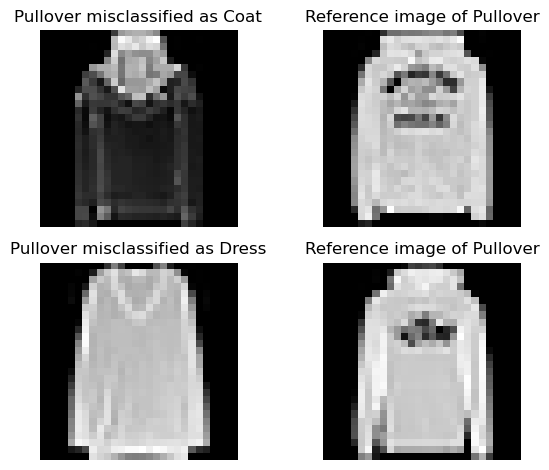

In [14]:
# First we need to extract all misclassified items
# Smooth solution from: https://stackoverflow.com/questions/25551977/retrieve-misclassified-documents-using-scikitlearn
misclassified = np.where(test_labels != y_pred)
misclassified_labels = y_pred[misclassified[0]]
misclassified_data = test_data[misclassified[0]]
true_labels = test_labels[misclassified[0]]

# Now limit to only two classes, shirt and pullover
shirt_pullover_indices = np.where((true_labels == 6) | (true_labels == 2))
misclassified_data = misclassified_data[shirt_pullover_indices[0]]
misclassified_labels = misclassified_labels[shirt_pullover_indices[0]]
true_labels = true_labels[shirt_pullover_indices[0]]

# Write out labels for plotting purposes
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Random n & k to show new examples every time
n = np.random.choice(misclassified_labels.shape[0])
k = np.random.choice(misclassified_labels.shape[0])

# Generate 2 x 2 images. One misclassified image, the other a reference image of the class the model thought it was.
plt.subplots(2, 2)
plt.subplot(221)
# Get the first image, data from the misclassified dataset and reshape it to a 28x28 image
misclassified_image = misclassified_data[k].reshape(28, 28)
plt.imshow(misclassified_image, cmap='gray')
# Get the labels
plt.title(f"{labels[true_labels[k]]} misclassified as {labels[misclassified_labels[k]]}")
plt.axis('off')

plt.subplot(2,2,2)
# Find the index of a correctly classified image with the same true label, messy condition for the index ;<
index_reference_data = np.random.choice(np.where((test_labels == true_labels[k]) & (test_labels != misclassified_labels[k]))[0])
reference_image = test_data[index_reference_data].reshape(28, 28)
plt.imshow(reference_image, cmap='gray')
plt.title(f"Reference image of {labels[true_labels[k]]}")
plt.axis('off')

plt.subplot(2,2,3)
misclassified_image = misclassified_data[n].reshape(28, 28)
plt.imshow(misclassified_image, cmap='gray')
plt.title(f"{labels[true_labels[n]]} misclassified as {labels[misclassified_labels[n]]}")
plt.axis('off')

plt.subplot(2,2,4)
index_reference_data = np.random.choice(np.where((test_labels == true_labels[n]) & (test_labels != misclassified_labels[n]))[0])
reference_image = test_data[index_reference_data].reshape(28, 28)
plt.imshow(reference_image, cmap='gray')
plt.title(f"Reference image of {labels[true_labels[n]]}")
plt.axis('off')
plt.tight_layout()
plt.show()



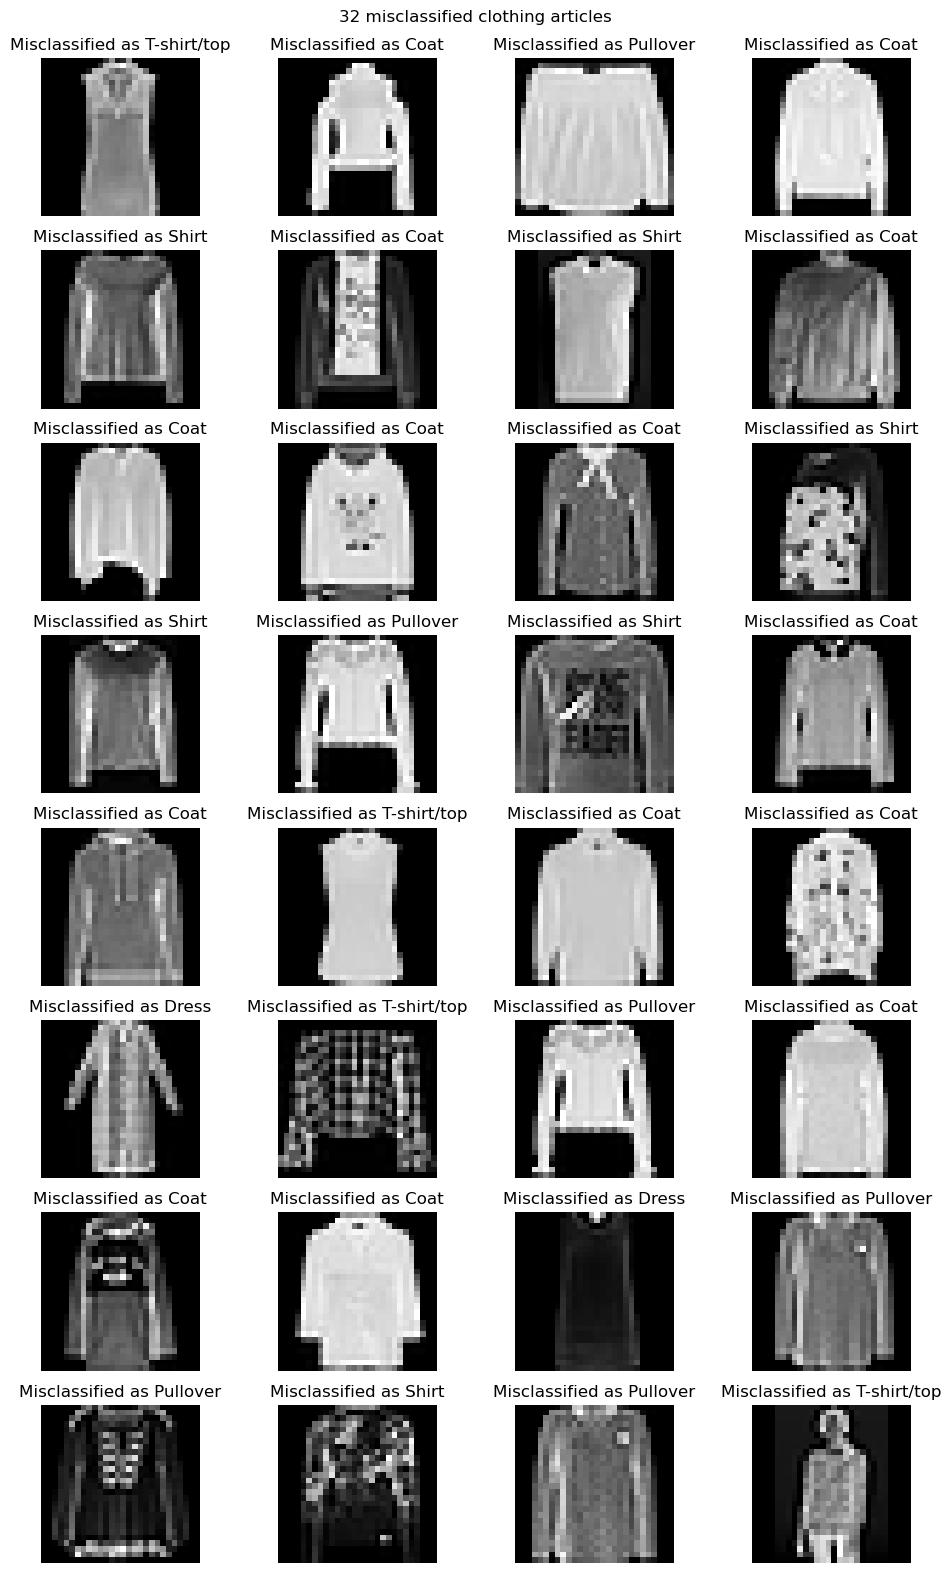

In [11]:
# This is mainly the same code as in the first part of exercise 1.
num_images = 32
fig, axes = plt.subplots(8, 4, figsize=(10,16))

for i in range(num_images):

  n = np.random.randint(0, misclassified_labels.shape[0])
  image_pixels = misclassified_data[n].reshape(28, 28)
  label = label_description[misclassified_labels[n]]

  ax = axes[i // 4, i % 4]
  ax.imshow(image_pixels, cmap='gray')
  ax.set_title(f"Misclassified as {label}")
  ax.axis('off')

plt.tight_layout()
fig.suptitle(f'{num_images} misclassified clothing articles')
fig.subplots_adjust(top=0.95)
plt.show()